# Jules Cazaubiel and Nicholas Tourtillott
# Project - CS 539
### Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import re
import string
from statistics import mean

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE

from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcaza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcaza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jcaza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Import and preprocessing

In [2]:
# Import company data and preprocess all tweets
def preprocess_corpus():
    companies = pd.read_csv("companies_and_social_media_info.csv")
    tweets = pd.read_csv("all_tweets_750.csv")
    companies = companies.dropna(subset=["Twitter"])
    twitter_score = companies.set_index("Twitter").to_dict()["Performance.Band"]
    tweets["score"] = tweets["user"].map(twitter_score)
    tweets["content"] = tweets["content"].apply(preprocess_tweet)
    corpus = tweets[["user", "content", "score"]]
    return corpus

# Function to process individual tweets before NLP
def preprocess_tweet(tweet):
    stop_words = set(stopwords.words('english'))
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in filtered_words]

    return " ".join(lemma_words)

# Call function to preprocess the corpus and keep a duplicate that will not be altered
corpus = preprocess_corpus()
corpus.head()

,user,content,score
0,CSX,Thanks tremendous efforts CSX employees serve ...,A
1,CSX,Our aim grow business To need great employees ...,A
2,CSX,CSX ’ concern employees customers communities ...,A
3,CSX,CSX committed helping customers North America ...,A
4,CSX,The CSX Q1 2022 performance reflects tireless ...,A


### Random Forest

train accuracy:  0.9866645136113465
test accuracy:  0.7803076177788543
train accuracy:  0.9870682114838588
test accuracy:  0.7803076177788543
train accuracy:  0.987175864249862
test accuracy:  0.7809131645876226
train accuracy:  0.9869067323348539
test accuracy:  0.7760687901174761
train accuracy:  0.9870547548881085
test accuracy:  0.7866053045900449
train accuracy:  0.9869067323348539
test accuracy:  0.7851519922490009
train accuracy:  0.9869336455263548
test accuracy:  0.7835775705462033
train accuracy:  0.9868529059518523
test accuracy:  0.7807920552258689
train accuracy:  0.9867856229731002
test accuracy:  0.7812764926728836
train accuracy:  0.98710858127111
test accuracy:  0.781518711396391


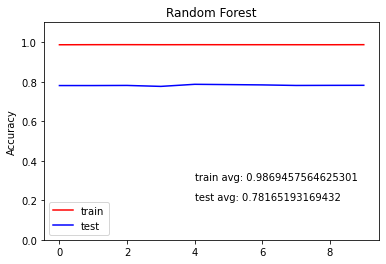

In [3]:
def run_model():

    kf = KFold(n_splits=10, shuffle=True, random_state = 0)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    train_acc_list = []
    test_acc_list = []
 
    # Iterate over each train-test split
    for train_index, test_index in kf.split(corpus['content']):
        
        # Split train-test
        train_set, test_set = corpus['content'].iloc[train_index], corpus['content'].iloc[test_index]
        train_label, test_label = corpus['score'].iloc[train_index], corpus['score'].iloc[test_index]
        
        # Encode the labels 
        encoder = LabelEncoder()
        encoder.fit(corpus["score"])
        test_label = encoder.transform(test_label)
        train_label = encoder.transform(train_label)

        # Encode the tweet content
        tfidf_vect = TfidfVectorizer()
        tfidf_vect.fit(corpus["content"])
        train_set_tfidf = tfidf_vect.transform(train_set)
        test_set_tfidf = tfidf_vect.transform(test_set)
        
        # Train classifier
        clf = RandomForestClassifier()
        clf.fit(train_set_tfidf, train_label)
        
        # Make predictions
        train_predictions = clf.predict(train_set_tfidf)
        test_predictions = clf.predict(test_set_tfidf)
        
        # Get accuracy
        train_accuracy = accuracy_score(train_predictions, train_label)
        test_accuracy = accuracy_score(test_predictions, test_label)
        
        # Append accuracies to lists
        train_acc_list.append(train_accuracy)
        test_acc_list.append(test_accuracy)
        
        print('train accuracy: ', train_accuracy)
        print('test accuracy: ', test_accuracy)
        
    
    train_avg = 'train avg: ' + str(mean(train_acc_list))
    test_avg = 'test avg: ' + str(mean(test_acc_list))
    
    plt.plot(train_acc_list, color = 'r', label = 'train')
    plt.plot(test_acc_list, color = 'b', label = 'test')
    
    ax = plt.gca()
    ax.set_ylim([0, 1.1])
    plt.text(4, 0.3, train_avg)
    plt.text(4, 0.2, test_avg)
    plt.legend()
    plt.title('Random Forest')
    plt.ylabel('Accuracy')
    plt.show()
    
run_model()

### SVM

train accuracy:  0.9588228170037544
test accuracy:  0.8001695531064551
train accuracy:  0.9589842961527593
test accuracy:  0.7947196318275402
train accuracy:  0.9592937978550187
test accuracy:  0.7942351943805256
train accuracy:  0.9588631867910056
test accuracy:  0.7960518348068306
train accuracy:  0.9591592318975146
test accuracy:  0.7975051471478746
train accuracy:  0.9586344246632487
test accuracy:  0.7987162407654111
train accuracy:  0.9594552770040236
test accuracy:  0.7949618505510476
train accuracy:  0.959307254450769
test accuracy:  0.7975051471478746
train accuracy:  0.959105405514513
test accuracy:  0.7990795688506721
train accuracy:  0.9590381225357609
test accuracy:  0.7981106939566428


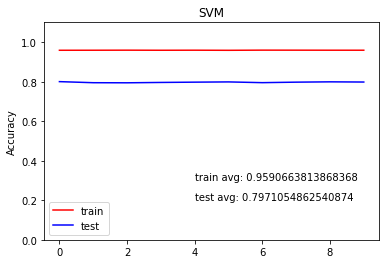

In [4]:
def run_model():

    kf = KFold(n_splits=10, shuffle=True, random_state = 0)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    train_acc_list = []
    test_acc_list = []
 
    # Iterate over each train-test split
    for train_index, test_index in kf.split(corpus['content']):
        
        # Split train-test
        train_set, test_set = corpus['content'].iloc[train_index], corpus['content'].iloc[test_index]
        train_label, test_label = corpus['score'].iloc[train_index], corpus['score'].iloc[test_index]
        
        # Encode the labels 
        encoder = LabelEncoder()
        encoder.fit(corpus["score"])
        test_label = encoder.transform(test_label)
        train_label = encoder.transform(train_label)

        # Encode the tweet content
        tfidf_vect = TfidfVectorizer()
        tfidf_vect.fit(corpus["content"])
        train_set_tfidf = tfidf_vect.transform(train_set)
        test_set_tfidf = tfidf_vect.transform(test_set)
        
        # Train classifier
        clf = svm.SVC()
        clf.fit(train_set_tfidf, train_label)
        
        # Make predictions
        train_predictions = clf.predict(train_set_tfidf)
        test_predictions = clf.predict(test_set_tfidf)
        
        # Get accuracy
        train_accuracy = accuracy_score(train_predictions, train_label)
        test_accuracy = accuracy_score(test_predictions, test_label)
        
        # Append accuracies to lists
        train_acc_list.append(train_accuracy)
        test_acc_list.append(test_accuracy)
        
        print('train accuracy: ', train_accuracy)
        print('test accuracy: ', test_accuracy)
        
    
    train_avg = 'train avg: ' + str(mean(train_acc_list))
    test_avg = 'test avg: ' + str(mean(test_acc_list))
    
    plt.plot(train_acc_list, color = 'r', label = 'train')
    plt.plot(test_acc_list, color = 'b', label = 'test')
    
    ax = plt.gca()
    ax.set_ylim([0, 1.1])
    plt.text(4, 0.3, train_avg)
    plt.text(4, 0.2, test_avg)
    plt.legend()
    plt.title('SVM')
    plt.ylabel('Accuracy')
    plt.show()
    
run_model()

### Naive Bayes Classifier 

In [1]:
def run_model():

    kf = KFold(n_splits=10, shuffle=True, random_state = 0)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    train_acc_list = []
    test_acc_list = []
 
    # Iterate over each train-test split
    for train_index, test_index in kf.split(corpus['content']):
        
        # Split train-test
        train_set, test_set = corpus['content'].iloc[train_index], corpus['content'].iloc[test_index]
        train_label, test_label = corpus['score'].iloc[train_index], corpus['score'].iloc[test_index]
        
        # Encode the labels 
        encoder = LabelEncoder()
        encoder.fit(corpus["score"])
        test_label = encoder.transform(test_label)
        train_label = encoder.transform(train_label)

        # Encode the tweet content
        tfidf_vect = TfidfVectorizer()
        tfidf_vect.fit(corpus["content"])
        train_set_tfidf = tfidf_vect.transform(train_set)
        test_set_tfidf = tfidf_vect.transform(test_set)
        
        # Train classifier
        clf = GaussianNB()
        clf.fit(train_set_tfidf, train_label)
        
        # Make predictions
        train_predictions = clf.predict(train_set_tfidf)
        test_predictions = clf.predict(test_set_tfidf)
        
        # Get accuracy
        train_accuracy = accuracy_score(train_predictions, train_label)
        test_accuracy = accuracy_score(test_predictions, test_label)
        
        # Append accuracies to lists
        train_acc_list.append(train_accuracy)
        test_acc_list.append(test_accuracy)
        
        print('train accuracy: ', train_accuracy)
        print('test accuracy: ', test_accuracy)
        
    
    train_avg = 'train avg: ' + str(mean(train_acc_list))
    test_avg = 'test avg: ' + str(mean(test_acc_list))
    
    plt.plot(train_acc_list, color = 'r', label = 'train')
    plt.plot(test_acc_list, color = 'b', label = 'test')
    
    ax = plt.gca()
    ax.set_ylim([0, 1.1])
    plt.text(4, 0.3, train_avg)
    plt.text(4, 0.2, test_avg)
    plt.legend()
    plt.title('Naive Bayes Classifier')
    plt.ylabel('Accuracy')
    plt.show()

### Neural Network

train accuracy:  0.9786578391398544
test accuracy:  0.7273828266925033
train accuracy:  0.9797209102041365
test accuracy:  0.726413951798474
train accuracy:  0.9790480804166162
test accuracy:  0.7273828266925033
train accuracy:  0.9794248650976276
test accuracy:  0.7210851398813128
train accuracy:  0.9790480804166162
test accuracy:  0.7224173428606031
train accuracy:  0.9791153633953682
test accuracy:  0.7328327479714182
train accuracy:  0.9800842382893975
test accuracy:  0.7216906866900812
train accuracy:  0.9796670838211349
test accuracy:  0.7166040934964273
train accuracy:  0.9788866012676113
test accuracy:  0.726050623713213
train accuracy:  0.980730154885417
test accuracy:  0.7150296717936296


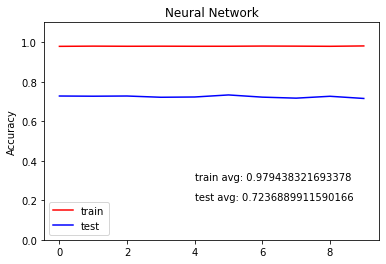

In [6]:
def run_model():

    kf = KFold(n_splits=10, shuffle=True, random_state = 0)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    train_acc_list = []
    test_acc_list = []
 
    # Iterate over each train-test split
    for train_index, test_index in kf.split(corpus['content']):
        
        # Split train-test
        train_set, test_set = corpus['content'].iloc[train_index], corpus['content'].iloc[test_index]
        train_label, test_label = corpus['score'].iloc[train_index], corpus['score'].iloc[test_index]
        
        # Encode the labels 
        encoder = LabelEncoder()
        encoder.fit(corpus["score"])
        test_label = encoder.transform(test_label)
        train_label = encoder.transform(train_label)

        # Encode the tweet content
        tfidf_vect = TfidfVectorizer()
        tfidf_vect.fit(corpus["content"])
        train_set_tfidf = tfidf_vect.transform(train_set)
        test_set_tfidf = tfidf_vect.transform(test_set)
        
        # Train classifier
        clf = clf = MLPClassifier(hidden_layer_sizes=(10, 4), random_state=1, max_iter = 1000)
        clf.fit(train_set_tfidf, train_label)
        
        # Make predictions
        train_predictions = clf.predict(train_set_tfidf)
        test_predictions = clf.predict(test_set_tfidf)
        
        # Get accuracy
        train_accuracy = accuracy_score(train_predictions, train_label)
        test_accuracy = accuracy_score(test_predictions, test_label)
        
        # Append accuracies to lists
        train_acc_list.append(train_accuracy)
        test_acc_list.append(test_accuracy)
        
        print('train accuracy: ', train_accuracy)
        print('test accuracy: ', test_accuracy)
        
    
    train_avg = 'train avg: ' + str(mean(train_acc_list))
    test_avg = 'test avg: ' + str(mean(test_acc_list))
    
    plt.plot(train_acc_list, color = 'r', label = 'train')
    plt.plot(test_acc_list, color = 'b', label = 'test')
    
    ax = plt.gca()
    ax.set_ylim([0, 1.1])
    plt.text(4, 0.3, train_avg)
    plt.text(4, 0.2, test_avg)
    plt.legend()
    plt.title('Neural Network')
    plt.ylabel('Accuracy')
    plt.show()
    
run_model()

### Case Study - Predict the grade of "secretive" companies (that did not disclose emission data)
Using the highest scoring model - Random Forest

In [7]:
# Import case study data and create a corpus for it
def case_study_process():
    tweets = pd.read_csv("case_study_tweets.csv")
    tweets["content"] = tweets["content"].apply(preprocess_tweet)
    case_study_corpus = tweets[["user", "content"]]
    return case_study_corpus

case_study_corpus = case_study_process()
case_study_corpus.head()

,user,content
0,Hersheys,Were sorry see Please send us DM UPC manufactu...
1,Hersheys,Appreciate flagging Send us DM UPC amp manufac...
2,Hersheys,Oh ’ look right DM us UPC amp manufacturing co...
3,Hersheys,¡Lamentamos que esto haya ocurrido Por favor m...
4,Hersheys,Appreciate flagging Send us DM UPC amp manufac...


In [8]:
def run_model():

    # Split original corpus data to train the RF model
    train_set, test_set, train_label, test_label = model_selection.train_test_split(corpus["content"], corpus["score"], 
                                                                                    test_size=0.2, random_state = 0)
    case_study = case_study_corpus['content']
    
    # Encode the labels 
    encoder = LabelEncoder()
    encoder.fit(corpus["score"])
    test_label = encoder.transform(test_label)
    train_label = encoder.transform(train_label)

    # Encode the tweet content
    tfidf_vect = TfidfVectorizer()
    tfidf_vect.fit(corpus["content"])
    train_set_tfidf = tfidf_vect.transform(train_set)
    test_set_tfidf = tfidf_vect.transform(test_set)

    # Encode the case study tweet content
    case_study_tfidf = tfidf_vect.transform(case_study_corpus['content'])
    
    # Train classifier
    clf = RandomForestClassifier()
    clf.fit(train_set_tfidf, train_label)

    # Make predictions
    train_predictions = clf.predict(train_set_tfidf)
    test_predictions = clf.predict(test_set_tfidf)
    
     # Get accuracy of model
    train_accuracy = accuracy_score(train_predictions, train_label)
    test_accuracy = accuracy_score(test_predictions, test_label)
    print('train accuracy: ', train_accuracy)
    print('test accuracy: ', test_accuracy)
    
    # Make case study predictions
    case_study_pred = clf.predict(case_study_tfidf)

    # Predict the grade of all the case study tweets and add this prediction as a column to the case study corpus
    case_study_corpus['prediction'] = case_study_pred
    cs_tweets = case_study_corpus
    
    # Get the mode of all tweet grades for each company (= the predicted grade for the company as a whole)
    companies = np.unique(cs_tweets["user"])
    companies_summary = pd.DataFrame(columns=["user", "prediction"])
    for entry in companies:
        company = cs_tweets[cs_tweets["user"] == entry]
        companies_summary = companies_summary.append({"user": entry, "prediction": company["prediction"].mode()}, ignore_index=True)
    
    # Reverse the encoding so that the grades go from numbers to grades again
    cs_tweets["prediction"] = encoder.inverse_transform(cs_tweets["prediction"].tolist())
    companies_summary["prediction"] = encoder.inverse_transform(companies_summary["prediction"].tolist())

    # Record the grade for each tweet and the grade for each company in csv files
    cs_tweets.to_csv("case_study_tweets_grades.csv")
    companies_summary.to_csv("case_study_companies_grades.csv")
    
run_model()

train accuracy:  0.9869353276008236
test accuracy:  0.777885430543781


C:\Users\jcaza\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### TSNE - 2D Projection of the tweet dataset

In [ ]:
# Get tweet data and encode it
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(corpus["content"])
data_encoded = tfidf_vect.transform(corpus['content'])
    
# Embed tweet data to 2 dimensions
model = TSNE(n_components=2, random_state=0)
data_tsne = model.fit_transform(data_encoded) 

# Get the embedded x_train and the activity labels as a dataframe and plot them
train_activity = pd.DataFrame(data_tsne, columns = ['X','Y'])
train_activity['grade'] = corpus['score']

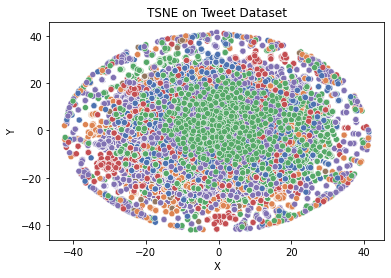

In [16]:
sns.scatterplot(data = train_activity, x = 'X', y = 'Y', hue = 'grade', palette = 'deep', legend = None)
plt.title('TSNE on Tweet Dataset')
plt.show()